##Imports de Bibliotecas/Arquivos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
df21 = pd.read_csv('https://raw.githubusercontent.com/BernnardoSBO/ICD-TrabalhoFinal/master/databases/world-happiness-report-2021.csv')
dft = pd.read_csv('https://raw.githubusercontent.com/BernnardoSBO/ICD-TrabalhoFinal/master/databases/world-happiness-report.csv')

#1. Analisando e Concatenando as Bases de Dados

Primeiramente, vamos visualizar o conteúdo das tabelas

##Tabela 'world-happiness-report'

Primeiramente, vamos dar uma olhada na tabela afim de começar a nosso entendimento de como os dados estão disponibilizados

In [3]:
dft.head(2)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.190,0.850,0.584,0.237


In [4]:
print("A tabela 'world-happiness-report' apresenta ", dft.shape[0], " observações, cada uma com ", dft.shape[1], " propriedades")

A tabela 'world-happiness-report' apresenta  1949  observações, cada uma com  11  propriedades


<p>Podemos observar que essa tabela apresenta como uma de suas colunas o parâmetro 'year', que nos diz qual foi o ano em que aqueles dados foram coletados.</p>
<p>
Portanto, vamos verificar quais anos estão presentes nessa tabela

In [5]:
b = dft['year'].min()
t = dft['year'].max()
anos = np.arange(b,t + 1,1)

print('Os anos em que os estudos foram feitos na primeira tabela são:\n', end='')

for i in range(len(anos) - 1):
  print(anos[i],end=', ')

print(anos[len(anos)-1], end='.')

Os anos em que os estudos foram feitos na primeira tabela são:
2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020.

<p>Assim, conseguimos ver que o estudo foi realizado em todos os anos desde 2005 até 2020.</p>
<p>Seria interessante para nós criarmos visualizações para analisar a diferença entre o conteúdo da tabela nos diferentes anos em que a pequisa foi realizada</p>
<p>Obs: Uma vez que estamos separando por ano, convém excluirmos o parâmetro 'year' nas novas tabelas</p>

In [6]:
dict_years = {}

for year in anos:
  yearIndex = dft['year'] == year
  df_aux = dft[yearIndex]
  dict_years[year] = df_aux
  dict_years[year] = dict_years[year].drop(labels='year',axis=1)


###Visualizando o número de observações de cada pesquisa

In [7]:
print('O número de observações em cada ano é:')
sum = 0
for year in anos:
  print( year, ': ', dict_years[year].shape[0])

O número de observações em cada ano é:
2005 :  27
2006 :  89
2007 :  102
2008 :  110
2009 :  114
2010 :  124
2011 :  146
2012 :  142
2013 :  137
2014 :  145
2015 :  143
2016 :  142
2017 :  147
2018 :  142
2019 :  144
2020 :  95


Como as tabelas de cada ano não possuem a mesma quantidade de observações, precisamos lidar com esse problema antes de realizarmos a análise de nossos dados

<p>Pensando no contexto dos em que esses estudos foram realizados, podemos deixar de usar os dados dos anos com menos participantes por uma série de motivos:
  <ul>
    <li>Aumentar os países que participaram frequentemente das pesquisas</li>
    <li>Países que participaram poucas vezes não apresentam dados suficientes para serem analisados ao passar dos anos</li>
    <li>Analisando um período menor, vamos ter mais países que participaram frequentemente da pesquisa</li>
  </ul>
</p>
<p>Assim, seria interessante definirmos um limiar para decidirmos se vamos incluir ou excluir a data</p>


Iremos utilizar a média como limiar para participação ou não da nossa análise

In [8]:
mediaParticipantes = round((dft.shape[0] + df21.shape[0])/17, 2)
print('A média de paises participantes em cada pesquisa é de: ', mediaParticipantes )

A média de paises participantes em cada pesquisa é de:  123.41


In [9]:
for year in anos:
  if dict_years[year].shape[0] < mediaParticipantes:
    del dict_years[year]

anos = list(dict_years.keys())

##Tabela 'world-happiness-report-2021'

Assim, como feito anteriormente, vamos dar uma breve olhada para interpretarmos o conteúdo da tabela correspondente a 2021

In [10]:
df21.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


Diferente da tabela anterior, essa tabela apresenta as observações de apenas um ano (2020) da pesquisa.

Além disso, as observações estrapolam o limiar que decidimos anteriormente, logo se utilizarmos esses dados seguiremos coerentes

##Comparando o conteúdo das tabelas

É possível perceber rapidamente que as instâncias dessa tabela possuem mais propriedades do que a tabela anterior. Vamos analisar quais são as propriedades compartilhadas por ambas as tabelas

In [11]:
df_columns = pd.DataFrame()
df_columns = pd.concat( [ pd.DataFrame(dft.columns.tolist()), pd.DataFrame(df21.columns.tolist()) ], axis=1 )
df_columns.set_axis(['2005-2020 database columns','2021 database columns'], axis=1, inplace=True)

df_columns

,2005-2020 database columns,2021 database columns
0,Country name,Country name
1,year,Regional indicator
2,Life Ladder,Ladder score
3,Log GDP per capita,Standard error of ladder score
4,Social support,upperwhisker
5,Healthy life expectancy at birth,lowerwhisker
6,Freedom to make life choices,Logged GDP per capita
7,Generosity,Social support
8,Perceptions of corruption,Healthy life expectancy
9,Positive affect,Freedom to make life choices


Conseguimos ver que a tabela do ano de 2020 possuí uma série de outras colunas quando comparada com a tabela dos outros anos. Assim, para realizarmos nossas análises, precisamos reformatar as tabelas com parametros que elas possuem em comum.

##Reformatando as tabelas

Primeiramente, adicionaremos a nossa tabela de 2021 para o nosso dicionário de tabelas

In [12]:
dict_years[2021] = df21
dict_years[2021].head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


Agora, vamos

<p>Através das exibições anteriores das tabelas, além da demonstração dos nomes das propriedades, podemos perceber que existem várias colunas das tabelas de dados que de duas uma:<p>
<ul>
  <li>Possuem o mesmo nome</li>
  <li>Possuem o nome ligeiramente diferente</li>
</ul>
<p>Assim, cabe fazer uma analise, exibindo instancias das duas formatações de tabelas afim de percebermos aqueles parâmetros que são semelhantes.</p>
<p> Para fazermos isso, utilizaremos a tabela correspondente ao ano de 2017, uma vez que é o ano que mais se aproxima com a quantidade de observações do ano de 2021<p>

In [13]:
d2021 = dict_years[2021]
d2021[d2021['Country name'] == 'Brazil']

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
34,Brazil,Latin America and Caribbean,6.33,0.043,6.415,6.245,9.577,0.882,66.601,0.804,-0.071,0.756,2.43,1.028,0.944,0.571,0.514,0.142,0.117,3.015


In [14]:
d2017 = dict_years[2017]
d2017[d2017['Country name'] == 'Brazil']

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
229,Brazil,6.333,9.583,0.905,66.2,0.765,-0.175,0.794,0.716,0.308


Olhando para as duas observações em anos diferentes, podemos observar que as propriedades que se encaixam no que foi dito anteriormente são:
<ul>
<li>Propriedades com mesmo nome</li>


In [15]:
intersec = list(set(d2017).intersection(d2021))
print('São elas: ', end='')
for i in range(len(intersec) - 1):
  print(intersec[i], end=', ')

print(intersec[len(intersec) - 1], end='.')

São elas: Social support, Freedom to make life choices, Generosity, Perceptions of corruption, Country name.

<ul>
<li>Propriedades com nomes diferentes</li>
</ul>

In [16]:
dif1_0 = list(set(d2021) - set(d2017))
dif1_0.sort()
dif0_1 = list(set(d2017) - set(d2021))
dif0_1.sort()
dif = dif1_0 + dif0_1
print('São elas: \n\tAs que estão na primeira tabela (todos os anos) e não na segunda: ', end='\n')

for i in range(len(dif0_1) - 1):
  print('\t\t',dif0_1[i], end=',\n')

print('\t\t', dif0_1[len(dif0_1) - 1],'.\n')

print('\t As que estão na segunda tabela (2021) e não estão na primeira: ', end='\n')

for i in range(len(dif1_0) - 1):
  print('\t\t',dif1_0[i], end=',\n')

print('\t\t', dif1_0[len(dif0_1) - 1],'.\n')

São elas: 
	As que estão na primeira tabela (todos os anos) e não na segunda: 
		 Healthy life expectancy at birth,
		 Life Ladder,
		 Log GDP per capita,
		 Negative affect,
		 Positive affect .

	 As que estão na segunda tabela (2021) e não estão na primeira: 
		 Dystopia + residual,
		 Explained by: Freedom to make life choices,
		 Explained by: Generosity,
		 Explained by: Healthy life expectancy,
		 Explained by: Log GDP per capita,
		 Explained by: Perceptions of corruption,
		 Explained by: Social support,
		 Healthy life expectancy,
		 Ladder score,
		 Ladder score in Dystopia,
		 Logged GDP per capita,
		 Regional indicator,
		 Standard error of ladder score,
		 lowerwhisker,
		 Explained by: Log GDP per capita .



Podemos perceber que as propriedas a seguir são semelhantes, principalmente quando olhamos a distribuição dos dados.

###Verificando similaridade na distribuição de propriedades com nomes parecidos

In [17]:
color1 = 'mediumturquoise'
color2 = 'mediumpurple'

####(1) Log GDP per capita & (2) Logged GDP per capita

Text(0.5, 1.0, 'Overlap Histogram')

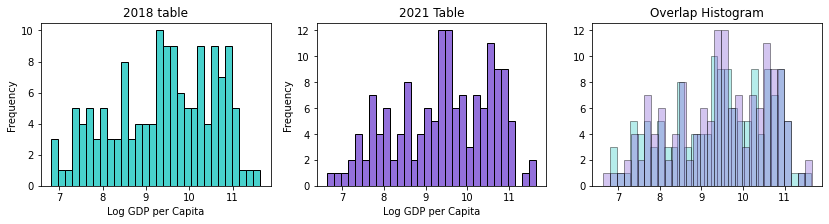

In [18]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(d2017['Log GDP per capita'], edgecolor='k', bins=30, color=color1)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Frequency')
plt.title('2018 table')

plt.subplot(132)
plt.xlabel('Log GDP per Capita')
plt.ylabel('Frequency')
plt.hist(d2021['Logged GDP per capita'], edgecolor='k', bins=30, color=color2)
plt.title('2021 Table')

plt.subplot(133)
plt.hist(d2017['Log GDP per capita'], edgecolor='k', bins=30, alpha=0.4, color=color1)
plt.hist(d2021['Logged GDP per capita'], edgecolor='k', bins=30, alpha=0.4, color=color2)
plt.title('Overlap Histogram')

In [19]:
print('Estimadores de 2021\n',d2021['Logged GDP per capita'].describe(), sep='')
print('\nEstimadores de 2017\n',d2017['Log GDP per capita'].describe(), sep='')

Estimadores de 2021
count    149.000000
mean       9.432208
std        1.158601
min        6.635000
25%        8.541000
50%        9.569000
75%       10.421000
max       11.647000
Name: Logged GDP per capita, dtype: float64

Estimadores de 2017
count    146.000000
mean       9.397034
std        1.180853
min        6.817000
25%        8.493000
50%        9.504000
75%       10.390000
max       11.634000
Name: Log GDP per capita, dtype: float64


####(1)Life Ladder & (2)Ladder Score

Text(0.5, 1.0, 'Overlap Histogram')

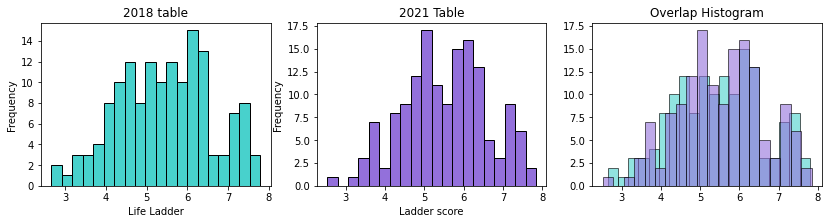

In [20]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(d2017['Life Ladder'], edgecolor='k', bins=20, color=color1)
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.title('2018 table')

plt.subplot(132)
plt.hist(d2021['Ladder score'], edgecolor='k', bins=20, color=color2)
plt.xlabel('Ladder score')
plt.ylabel('Frequency')
plt.title('2021 Table')

plt.subplot(133)
plt.hist(d2017['Life Ladder'], edgecolor='k', bins=20, alpha=0.6, color=color1)
plt.hist(d2021['Ladder score'], edgecolor='k', bins=20, alpha=0.6, color=color2)
plt.title('Overlap Histogram')

In [21]:
print('Estimadores de 2021\n',d2021['Ladder score'].describe(), sep='')
print('\nEstimadores de 2017\n', d2017['Life Ladder'].describe(), sep='')

Estimadores de 2021
count    149.000000
mean       5.532839
std        1.073924
min        2.523000
25%        4.852000
50%        5.534000
75%        6.255000
max        7.842000
Name: Ladder score, dtype: float64

Estimadores de 2017
count    147.000000
mean       5.460408
std        1.140804
min        2.662000
25%        4.619500
50%        5.553000
75%        6.251500
max        7.788000
Name: Life Ladder, dtype: float64


####(1)Healthy life expectancy at birth & (2)Healthy life expectancy

Text(0.5, 1.0, 'Overlap Histogram')

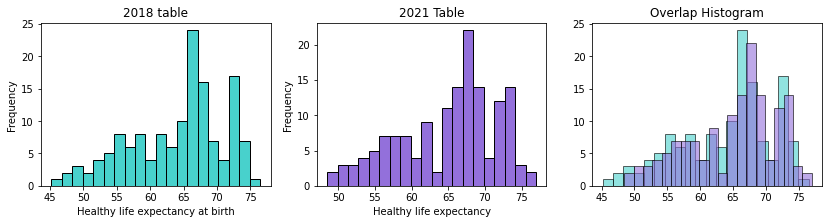

In [22]:
plt.figure(figsize=(14,3))

plt.subplot(131)
plt.hist(d2017['Healthy life expectancy at birth'], edgecolor='k', bins=20, color=color1)
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Frequency')
plt.title('2018 table')

plt.subplot(132)
plt.hist(d2021['Healthy life expectancy'], edgecolor='k', bins=20, color=color2)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Frequency')
plt.title('2021 Table')

plt.subplot(133)
plt.hist(d2017['Healthy life expectancy at birth'], edgecolor='k', bins=20, alpha=0.6, color=color1)
plt.hist(d2021['Healthy life expectancy'], edgecolor='k', bins=20, alpha=0.6, color=color2)
plt.title('Overlap Histogram')

In [23]:
print('Estimadores de 2021\n',d2021['Healthy life expectancy'].describe(), sep='')
print('\nEstimadores de 2017\n', d2017['Healthy life expectancy at birth'].describe(), sep='')

Estimadores de 2021
count    149.000000
mean      64.992799
std        6.762043
min       48.478000
25%       59.802000
50%       66.603000
75%       69.600000
max       76.953000
Name: Healthy life expectancy, dtype: float64

Estimadores de 2017
count    143.000000
mean      64.090231
std        7.086236
min       45.200000
25%       58.700000
50%       65.800000
75%       68.750000
max       76.500000
Name: Healthy life expectancy at birth, dtype: float64


####Reorganizando e renomeando as tabelas

<p>Os atributos análisados possuem nomes semelhantes e, além disso, distribuições e estimadores semelhantes. Para fim de análise, vamos reformular a tabela de 2021 considerando que esses atributos são os mesmos daqueles comparados em outros dataframes.</p>
<p> Além disso, vamos retirar aqueles atributos que ambos tipos de dataframe não tem em comum.</p>

In [24]:
df21c = df21[['Country name','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [25]:
dftc = dft[['year','Country name','Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity','Perceptions of corruption']]

Para fins de coerência, vamos renomear também os atributos dos dataframes para que fiquem iguais

In [26]:
df21c = df21c.rename(columns={'Country name':'Nome do País','Ladder score':'Nota para Escada de Cantril','Logged GDP per capita':'Log do PIB per capita',
                           'Social support':'Suporte Social','Healthy life expectancy':'Expectativa de Vida Saúdavel','Freedom to make life choices':'Liberdade para Escolhas da Vida',
                           'Generosity':'Generosidade','Perceptions of corruption':'Percepção de Corrupção'})

In [27]:
dftc = dftc.rename(columns={'Country name':'Nome do País','Life Ladder':'Nota para Escada de Cantril', 'Log GDP per capita':'Log do PIB per capita',
                            'Social support':'Suporte Social', 'Healthy life expectancy at birth':'Expectativa de Vida Saúdavel',
                            'Freedom to make life choices':'Liberdade para Escolhas da Vida','Generosity':'Generosidade','Perceptions of corruption':'Percepção de Corrupção'})

In [28]:
df21c.head(2)

,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179


In [29]:
dftc.head(2)

,year,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção
0,2008,Afghanistan,3.724,7.37,0.451,50.8,0.718,0.168,0.882
1,2009,Afghanistan,4.402,7.54,0.552,51.2,0.679,0.190,0.850


In [30]:
list(np.arange(2005,2022,1))

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Agora que já padronizamos os dados, vamos separá-los por ano novamente em um dicionário para melhor compreensão

####Criando um dicionário de dataframes com tabelas dos anos que tem mais do que a média de participantes em todos os anos

In [31]:
dict_years = {}
anos = list(np.arange(2005,2021,1))
mediaParticipantes =round((dft.shape[0] + df21.shape[0])/17, 2)



for year in anos:
  yearIndex = dftc['year'] == year
  df_aux = dftc[yearIndex]
  dict_years[year] = df_aux
  #excluindo o parametro ano
  dict_years[year] = dict_years[year].drop(labels='year', axis=1)
  #resetando os índices de cada dataframe  criado
  dict_years[year] = dict_years[year].reset_index(drop=True)
  #deletando anos que não possuem mais do que a média de participantes
  if dict_years[year].shape[0] < mediaParticipantes:
    del dict_years[year]

#adicionando o ano de 2021, o qual tem mais participantes do que a média
dict_years[2021] = df21c

anos = list(dict_years.keys())

####Excluindo países que não aparecem em todas as tabelas

In [32]:
#dicionário com chaves:
#   ano:[países participantes daquele ano]
paisesPresentes = {}
for year in anos:
  paisesPresentes[year] = dict_years[year]['Nome do País'].tolist()



paisesComuns = set(paisesPresentes[2010]).intersection(paisesPresentes[2011],paisesPresentes[2012],paisesPresentes[2013],paisesPresentes[2014], paisesPresentes[2015],
                   paisesPresentes[2016],paisesPresentes[2017],paisesPresentes[2018],paisesPresentes[2019],paisesPresentes[2021])
print('A quantidade de países em comum em todos os anos filtrados são: ',len(paisesComuns))

A quantidade de países em comum em todos os anos filtrados são:  102


In [33]:
for year in anos:
  df_aux = dict_years[year]
  df_aux = df_aux[df_aux['Nome do País'].isin(paisesComuns)]
  dict_years[year] = df_aux

####Lidando com países que possuem dados ausentes

Quando olhamos para a tabela com os países selecionados, conseguimos perceber que alguns apresentam ausência de dados

In [34]:
dict_years[2016][dict_years[2016].isna().any(axis=1)]

,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção
25,China,5.325,9.510,0.742,68.7,NaN,-0.228,NaN
63,Jordan,5.271,9.197,0.820,66.4,0.771,-0.038,NaN
66,Kosovo,5.759,9.228,0.824,NaN,0.827,0.125,0.941
98,Palestinian Territories,4.907,8.498,0.818,NaN,0.608,-0.129,0.812
108,Saudi Arabia,6.474,10.792,0.890,65.7,0.774,-0.132,NaN
122,Taiwan Province of China,6.513,10.855,0.895,NaN,0.719,-0.049,0.811
132,United Arab Emirates,6.831,11.105,0.849,66.7,0.949,0.131,NaN
136,Uzbekistan,5.893,8.756,0.945,64.5,0.984,0.208,NaN
139,Yemen,3.826,7.715,0.775,55.1,0.533,-0.151,NaN


<p>Essa ausência pode ocorrer de forma ocasional ou então de maneira frequente.</p>
<p>Um exemplo de ocorrência frequente na ausência de dados sao em países que apresentam certo cerceamento de liberdade de , onde o dado sobre 'Percepção de Corrupção' geralmente está ausente</p>
<p>Um bom exemplo é a China:</p>

In [35]:
for i in anos:
  print(i,': ',dict_years[i][dict_years[i]['Nome do País'] == 'China'][['Nome do País','Percepção de Corrupção']],'\n')


2010 :     Nome do País  Percepção de Corrupção
24        China                     NaN 

2011 :     Nome do País  Percepção de Corrupção
27        China                     NaN 

2012 :     Nome do País  Percepção de Corrupção
25        China                     NaN 

2013 :     Nome do País  Percepção de Corrupção
25        China                     NaN 

2014 :     Nome do País  Percepção de Corrupção
28        China                     NaN 

2015 :     Nome do País  Percepção de Corrupção
24        China                     NaN 

2016 :     Nome do País  Percepção de Corrupção
25        China                     NaN 

2017 :     Nome do País  Percepção de Corrupção
25        China                     NaN 

2018 :     Nome do País  Percepção de Corrupção
24        China                     NaN 

2019 :     Nome do País  Percepção de Corrupção
24        China                     NaN 

2021 :     Nome do País  Percepção de Corrupção
83        China                   0.755 



Percebemos que apenas no ano de 2021 o dado foi coletado

#####Substituindo

Assim, iremos tratar essa ausência substituindo por uma média de quando os valores estão presentes em outros anos. Para fazer isso com mais facilidade, iremos juntar os anos novamente, rotulando cada ano ao fazer isso.

In [36]:
dff = pd.DataFrame()

for year in anos:
  dict_years[year]['Ano'] = year
  dff = pd.concat([dff, dict_years[year]])

dff.fillna(dff.groupby(['Nome do País']).transform(np.mean), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#####Verificando

Verificando se ainda persistem valores nulos

In [37]:
dff[dff.isna().any(axis=1)]

,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção,Ano


Verificando se os valores a média foram realmente passados para cada NaN existente, usando o exemplo da China

In [38]:
dff[dff['Nome do País'] == 'China']['Percepção de Corrupção']

24    0.755
27    0.755
25    0.755
25    0.755
28    0.755
24    0.755
25    0.755
25    0.755
24    0.755
24    0.755
83    0.755
Name: Percepção de Corrupção, dtype: float64

#Conclusão

##Mudanças Realizadas no Data

<p>As mudanças realizadas no dataset foram baseadas no conteúdo ministrado em aula, prezando pela manutenção na coerência dos dados de acordo com as informações presentes no próprio dataset.</p>
<p>O que foi apresentado aqui foi a tentativa de reduzir a perda de dados (muitas vezes inconsitentes) e aumentar a coerência entre eles, equilibrando o máximo possível as decisões referentes aos dados faltantes/incoerentes.</p>
<p><b>As mudanças realizadas nos 2 datasets foram:</b></p>
<ol>
<li>Substituição dos nomes das propriedades em cada dataset para nomes em comum</li>
<li>Remoção de países que não participavam do estudo de maneira consistente ao passar dos anos</li>
<li>Substituição de valores nulos por médias das observações de outros anos de cada pais</li>
<li>Junção de dos datasets em apenas um, afim de facilitar nosso trabalho</li>

</ol>

##Export de Dataset

Agora que já realizamos a limpeza e o preenchimento do dataset com dados faltantes, cabe a nós exporta-los para realizarmos a nossa análise

In [47]:
!mkdir databases

In [48]:
dff.to_csv('databases/world-happiness-clean.csv', index=False)

In [50]:
#Para baixar o csv, só descomentar as próximas linhas
#from google.colab import files
#files.download('databases/world-happiness-clean.csv')